C:\Users\ASUS\AppData\Local\Temp\ipykernel_4268\3393984129.py:40: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(image_raw, image_compressed)


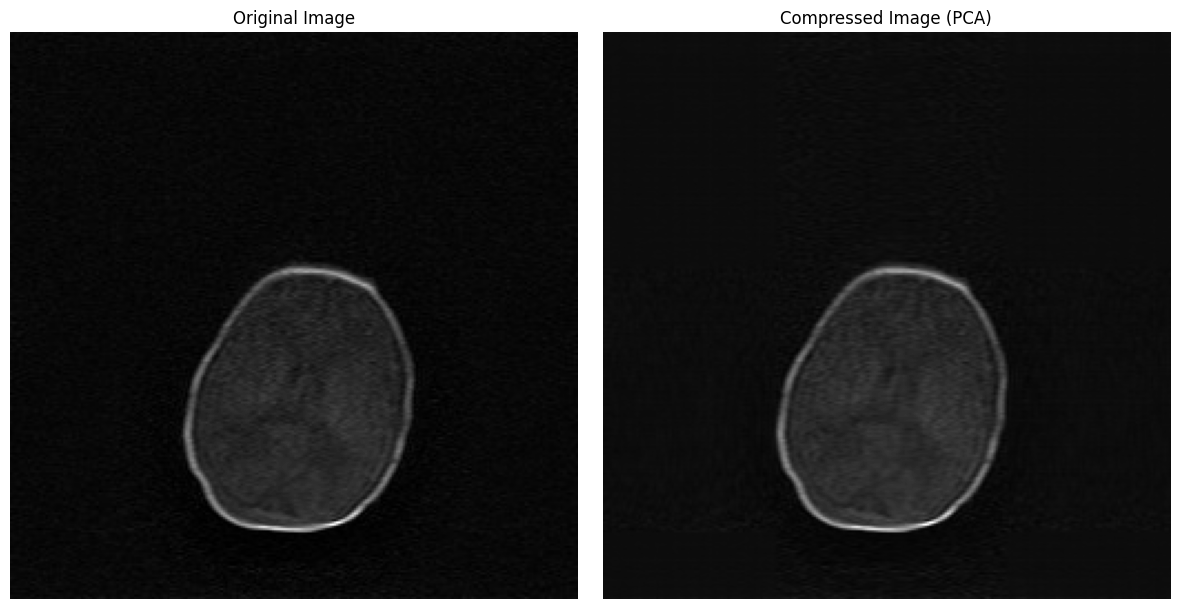

Compression Ratio: 2.4664516129032257
MSE: 4.36910357802991
PSNR: 41.726880202476934
SSIM: 0.9438114183475319


In [4]:
import numpy as np
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import os

def calculate_mse(image1, image2):
    # Calculate the mean squared error
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Load the image
image_raw = imread("../test.jpg")

# Perform PCA
pca = PCA()
pca.fit(image_raw)

variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Calculating the number of components needed to preserve 98% of the data
k = np.argmax(variance > 98)

# Perform Incremental PCA for compression
ipca = IncrementalPCA(n_components=k)
image_compressed = ipca.inverse_transform(ipca.fit_transform(image_raw))

imsave('./pca_ghyb.jpg', image_compressed)

# Calculate compression ratio
original_size = os.stat('../test.jpg').st_size
compressed_size = os.stat('./pca_ghyb.jpg').st_size
compression_ratio = original_size / compressed_size

# Calculate MSE
mse = calculate_mse(image_raw, image_compressed)

# Calculate PSNR
psnr = peak_signal_noise_ratio(image_raw, image_compressed)

# Calculate SSIM
data_range = image_raw.max() - image_raw.min()
ssim = structural_similarity(image_raw, image_compressed, data_range=data_range, multichannel=True)

# Display the original and compressed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_raw, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_compressed, cmap='gray')
plt.title('Compressed Image (PCA)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the calculated metrics
print("Compression Ratio:", compression_ratio)
print("MSE:", mse)
print("PSNR:", psnr)
print("SSIM:", ssim)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4268\247237200.py:44: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(image_raw, image_compressed)


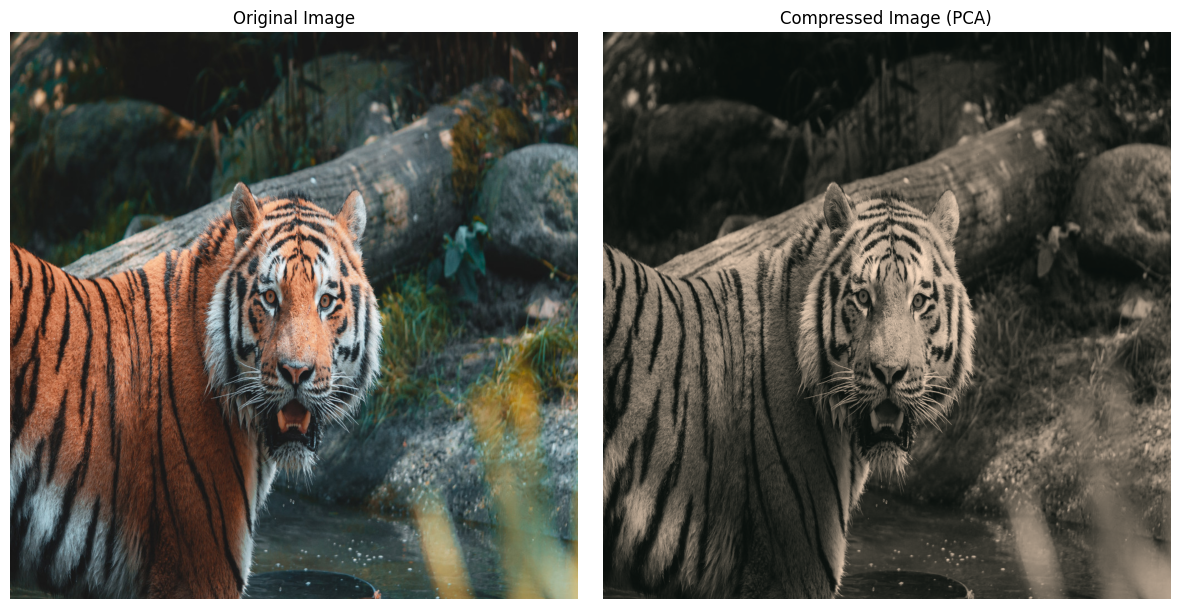

Compression Ratio: 2.5340589602627017
MSE: 7728.674723463126
PSNR: 9.24975331326211
SSIM: 0.9438114183475319


In [9]:
import numpy as np
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import os

def calculate_mse(image1, image2):
    # Calculate the mean squared error
    mse = np.mean((image1 - image2) ** 2)
    return mse

# Load the image
image_raw = imread("../image4.jpg")

# Perform PCA
pca = PCA()
pca.fit(image_raw.reshape(-1, 3))

variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Calculating the number of components needed to preserve 98% of the data
k = np.argmax(variance > 98)

# Perform Incremental PCA for compression
ipca = IncrementalPCA(n_components=k)
image_compressed = ipca.inverse_transform(ipca.fit_transform(image_raw.reshape(-1, 3))).reshape(image_raw.shape)

# Normalize the compressed image
image_compressed = (image_compressed - np.min(image_compressed)) / (np.max(image_compressed) - np.min(image_compressed))

# Save the compressed image
imsave('./pca_compressed.jpg', image_compressed)

# Calculate compression ratio
original_size = os.stat('../image4.jpg').st_size
compressed_size = os.stat('./pca_compressed.jpg').st_size
compression_ratio = original_size / compressed_size

# Calculate MSE
mse = calculate_mse(image_raw, image_compressed)

# Calculate PSNR
psnr = peak_signal_noise_ratio(image_raw, image_compressed)

# Calculate SSIM
data_range = image_raw.max() - image_raw.min()
# ssim = structural_similarity(image_raw, image_compressed, win_size=7, data_range=data_range, multichannel=True)

# Display the original and compressed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_raw)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_compressed)
plt.title('Compressed Image (PCA)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the calculated metrics
print("Compression Ratio:", compression_ratio)
print("MSE:", mse)
print("PSNR:", psnr)
# print("SSIM:", ssim)
